## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [91]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [92]:
# read the dataset and take a look at the top few rows
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [93]:
#find the number of rows in the dataset
df.shape[0]

294478

c. The number of unique users in the dataset.

In [94]:
#find the number of unique users in the dataset
df.user_id.nunique()

290584

d. The proportion of users converted.

In [95]:
# find the proportion of users converted
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [96]:
# dataframe with rows where control is not aligned with old_page
control_wrong = df.query('group == "control" and landing_page == "new_page"')
# treatment with rows where treatment is not aligned with new_page
treatment_wrong = df.query('group == "treatment" and landing_page == "old_page"')
#sum up these number of rows 
control_wrong.shape[0]+treatment_wrong.shape[0]

3893

f. Do any of the rows have missing values?

In [97]:
#find the number of null values in the dataset
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

We can see that there is no missing values in the dataset.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

Now, let's remove these columns.

In [98]:
#remove rows where control is not aligned with old_page and store it as df2
df2 = df.drop(control_wrong.index)
#remove rows where treatment is not aligned with new_page in df2
df2.drop(treatment_wrong.index, inplace = True)

In [99]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [100]:
# count the number of unique user_ids in df2
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [101]:
# find the duplicated user_id information repeated in df2
df2[df2.user_id.duplicated(keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [102]:
# find the duplicated user_id information repeated in df2
df2[df2.user_id.duplicated(keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [103]:
#drop the second row with a duplicate user_id
df2.drop_duplicates(subset = "user_id",inplace = True)

In [104]:
#check it
df2[df2.user_id.duplicated(keep = False)]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [105]:
# the probability of converting regardless of the page
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [106]:
# the probability of converting for control group
df2[df2['group'] == "control"].converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [107]:
# the probability of converting for treatment group
df2[df2['group'] == "treatment"].converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [108]:
# the probability that an individual received the new page
df2[df2['landing_page'] == 'new_page'].user_id.count()/df2.user_id.count()

0.50006194422266881

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**According these descriptive statistics results, the proportion of treatment group is about 50%, which is fair for the treatment group and control group have the same number. So we can compare the conversion rates for each group on the same basis. The conversion rate for the control group is about 12%, while for treatment group is just around 11.88%. I think there is no significant impact after the treatment since that new page doesn't lead to more conversions on average compare with the old page.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

- My null hypothesis is that there is no difference in converted rates between the new page and old page or the old page is better for more converted rates than the new page. In mathematical description, the converted rates for the new page minus the old page's will be equal to zero or less than zero.
- My alternative hypothesis is that the new page leads to more converted rate. In mathematical description, the converted rates for the new page minus the old page's will be larger than zero.

- With mathematical notation, it can be written as:

$$H_0: p_{new} - p_{old} \leq 0$$

$$H_1: p_{new} - p_{old} > 0$$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

Since under the null the the $p_{new}$ and $p_{old}$ are the same, the convert rate for both new page and old page just equal to the converted rate in ab_data.csv regardless of the page under the null hypothesis.

In [109]:
# count the converted rate regardless of the page and store it as p_undernull 
p_undernull = df2.converted.mean()

In [110]:
#  the converted rate for new page just equal to p_undernull 
p_new = p_undernull
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [111]:
# the converted rate for old page just equal to p_undernull 
p_old = p_undernull
p_old

0.11959708724499628

c. What is $n_{new}$?

In [112]:
# filter the df with new_page in landing_page
df_new = df2[df2['landing_page'] == 'new_page']
# count the number of user recieved the new page
n_new = df_new.user_id.count()
n_new

145310

d. What is $n_{old}$?

In [113]:
# filter the df with old_page in landing_page
df_old = df2[df2['landing_page'] == 'old_page']
# count the number of user recieved the old page
n_old = df_old.user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [114]:
# simulate the conversion treatment for new page 
# with sample size equal to the new page user in dataset 
# and wiht probability of convert rate under the null
new_page_converted = np.random.choice([0,1], size = n_new, p=[1-p_new,p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [115]:
# simulate the conversion treatment for old page 
# with sample size equal to the old page user in dataset 
# and with probability of convert rate under the null
old_page_converted = np.random.choice([0,1], size = n_old, replace=True,p=[1-p_old, p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [116]:
#calculate the difference of simulated converted proportion 
# between old and new page user
sample_diff = new_page_converted.mean() - old_page_converted.mean()
sample_diff

-0.00073877231908200947

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [117]:
# build a sampling distributions for the difference of converted proportion 
# store it as p_diffs
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0,1], size = n_new, replace=True, p=[1-p_new,p_new])
    old_page_converted = np.random.choice([0,1], size = n_old, replace=True, p=[1-p_old, p_old])
    p_diff = new_page_converted.mean()- old_page_converted.mean()
    p_diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

I also plot a line of actual difference observed in ab_data.cs to see where the  location of it in the distrubition.

In [118]:
#compute actual coverted rete for new page observed in ab_data.cs
actual_new = df2.query('landing_page == "new_page"').converted.mean()
#compute actual coverted rete for old page observed in ab_data.cs
actual_old = df2.query('landing_page == "old_page"').converted.mean()
#compute the difference
actual_diff = actual_new - actual_old

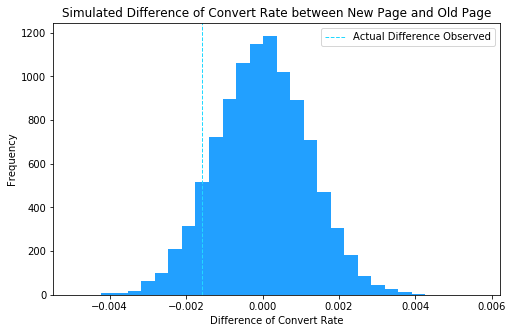

In [119]:
# plot histogram of the p_diffs
plt.subplots(figsize=(8, 5))
plt.hist(p_diffs, color='#22a0ff', bins=30)
# set x axis label
plt.xlabel('Difference of Convert Rate')
# set y axis label
plt.ylabel('Frequency')
# set title
plt.title('Simulated Difference of Convert Rate between New Page and Old Page')
# plot the line of actual difference
plt.axvline(actual_diff , c='#22d8ff', linestyle='dashed', linewidth=1, label="Actual Difference Observed")
plt.legend()
plt.show()

From the figure above, we can see that the simulated distribution of convert rate difference with large sample size 10,000 has normally distribution, with difference mean zero, which is corresponding to the difference in null hypothesis. Besides, we can see that the line of actual difference observed is located at the left of the null distribution.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [120]:
# use the actual_diff I computed before 
# and compute proportion of the p_diffs are greater than the actual difference
(p_diffs > actual_diff).mean()

0.90580000000000005

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value I computed in part j is called p-value. It means that under the null hypothesis distribution with mean of no difference in convert rate, the probability of obtaining one more extreme statistic in favor of the alternative. The smaller the p-value, the stronger is the evidence against null hypothesis and in favor of the alternative hypothesis.**

**I got the p-value with 0.9 which is very large, it means that a high proportion(90%) of the conveted differences in null hypothesis distribution are larger than the actual difference observed, which means there is a high probability that I can get a bigger difference of conveted rate under the null hypothesis distribution, so such the evidence that the actual observation may be just from the null hypothesis distribution. In other words, our observed value is quite consistent with null hypothesis, and there is no reason to reject it.**

**Therefore, with the high p-value 0.9, we do not have evidence to reject the null. So there is no evidence that this new page bring more convert rate for user.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [121]:
# import the module and conpute the number of conversions for each page
import statsmodels.api as sm
#conpute the number of conversions for old page
convert_old = df2.query('landing_page == "old_page"').converted.sum()
#conpute the number of conversions for new page
convert_new = df2.query('landing_page == "new_page"').converted.sum()
#conpute the number of rows associated with the old page
n_old = df2[df2['landing_page'] == 'old_page'].user_id.count()
#conpute the number of rows associated with the new page
n_new = df2[df2['landing_page'] == 'new_page'].user_id.count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [122]:
# find the test statistic and p-value
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- **According to the [textbook](https://www.cengage.co.uk/books/9781337094269/) page 316, the z-score in the test is as a test statistic based on sample data that used as a basis for deciding whether null hypothesis should be rejected. Under the assumption that the simulated difference of converted rate ($p_{new}$ - $p_{old}$) with large sample size has normally distribution, we can compute a z-score with the difference between observed and null hypothesis value for $p_{new}$ - $p_{old}$ and the estimated standard deviation for $p_{new}$ - $p_{old}$. Then by the z-score we can examine the observed value of $p_{new}$ - $p_{old}$ is located what level of standard deviations larger than or less than what we would have expected it to be under the null hypothesis is true. **

- **With the z-score equal to -1.31 here, the interpretation is that the observed value of $p_{new}$ - $p_{old}$ is 1.31 standard deviations less than what we would have expected it to be under the null hypothesis. The result not surprising enough to cast substantial doubt on null hypothesis.**

- **The p-value here, according to the [textbook](https://www.cengage.co.uk/books/9781337094269/) page 316, is the probability, calculated assuming that the null hypothesis is true, of obtaining a value of the test statistic at least as contradictory to null hypothesis as the value calculated from the observed sample data.**

- **With the p-value equal to 0.905 here, it is very large that about 90% of all samples of  $p_{new}$ - $p_{old}$ would give a test statistic value at least as contradictory to null hypothesis as is -1.31 when null hypothesis is true. So the data is quite consistent with the null hypothesis. Hence, we don't have evidence that this new page  bring more convert rate for user.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**The response variable in the test is convert rate, and it is categorical with two outcomes: conversion or no conversion, so it is suppose to use a logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [123]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [124]:
# add intercept
df2['intercept'] = 1
# add dummies for landing page and put them in ab_page column
df2['ab_page'] = pd.get_dummies(df2['landing_page'])['new_page']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [125]:
# use the logistic regression model
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
# fit the model
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [126]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 25 Mar 2018   Pseudo R-squ.:               8.077e-06
Time:                        01:00:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

<b>
Consider the logistic regression model,  

$\log(\dfrac{p}{1-p}) = $$b_{0}$ + $b_{1}$$x_{1}$

The $x_{1}$ here represents the ab page variable, and the $b_{1}$ here represents coefficient of the ab page variable in the regression model. The hypotheses test here associated with the regression model is primary to investigate whether the slope(i.e. $b_{1}$) is equal to zero vs. an alternative where the parameter differs from zero. Hence, the p-value here is to helps us determine if there is a statistically significant linear relationship between a particular variable and the response.

We can see that the p-value associated with ab page is 0.190 and it is high (if compare to common significant level 0.05), so we fail to reject the null hypothesis, which means we don't have evidence that the old/new page type has a significant linear relationship with the converted choice.

The p-value in the Part II, is primary to help us determine if there is a significant difference in converted rates between the new page and old page. The null hypothesis is that there is no difference in converted rates between the new page and old page or the old page is better for more converted rates than the new page. The alternative hypothesis is that the new page leads to more converted rate.

So compared to the regression p-value, they are different approach since they are under different hypotheses.
</b>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- **It would be a good idea to consider other factors to add into the regression model. Through the multiple linear regression model, it can help us to determine the relative influence of one or more predictor variables to the response value. Since we can see that the old/new page is not a main linear factor to the converted rate, maybe there are some factors have more effect on the convert decision. For example, the contries of users, the time users spent on the website or different seasons of using that can be influence individual convert decision.**

- **However, there are still disadvantages to adding additional terms. We should consider the potential problems like multi-collinearity when adding addition variables. Furthermore, non-linearity of the response-predictor relationships may occur when consider multiple factors.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [127]:
# import country data
df_country = pd.read_csv('countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [128]:
# join the country data to df2
df2 = df2.join(df_country.set_index('user_id'), on = 'user_id')
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [129]:
# check the country type
df2.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [130]:
# create the dummies for each country
country = pd.get_dummies(df2['country'])
df2 = df2.join(country)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [131]:
# use the logistic regression model
log_mod2 = sm.Logit(df2['converted'], df2[['intercept', 'CA', 'UK']])
# fit the model
results2 = log_mod2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 25 Mar 2018   Pseudo R-squ.:               1.521e-05
Time:                        01:00:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

From the result above, we can see that the p-value for each coefficient tested is large if compare to common significant level 0.05. It suggests that the country type of user are not associated with changes in the convert decision.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [132]:
# create the interaction variable column
# create the nteraction between page and CA 
df2['ab_CA'] = df2['ab_page']*df2['CA']
# create the nteraction between page and UK
df2['ab_UK'] = df2['ab_page']*df2['UK']
## create the nteraction between page and US
df2['ab_US'] = df2['ab_page']*df2['US']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,ab_CA,ab_UK,ab_US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0,0


Now build the interaction between page and CA in the regression model.

In [133]:
logit_mod3 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'CA', 'ab_CA']])
results3 = logit_mod3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 25 Mar 2018   Pseudo R-squ.:               2.567e-05
Time:                        01:00:45   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1409
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9880      0.008   -240.457      0.000      -2.004      -1.972
ab_page       -0.0123      0.012     -1.049      0.294      -0.035       0.011
CA            -0.0160      0.037     -0.429      0.668      -0.089       0.057
ab_CA         -0.0552      0.053     -1.034      0.301      -0.160       0.049
==============================================================================
"""

Now build the interaction between page and UK in the regression model.

In [134]:
logit_mod4 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'UK', 'ab_UK']])
results4 = logit_mod4.fit()
results4.summary()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 25 Mar 2018   Pseudo R-squ.:               2.036e-05
Time:                        01:00:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.2278
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9876      0.009   -213.551      0.000      -2.006      -1.969
ab_page       -0.0236      0.013     -1.788      0.074      -0.050       0.002
UK            -0.0046      0.019     -0.247      0.805      -0.041       0.032
ab_UK          0.0345      0.026      1.307      0.191      -0.017       0.086
==============================================================================
"""

Now build the interaction between page and US in the regression model.

In [135]:
logit_mod5 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'US', 'ab_US']])
results5 = logit_mod5.fit()
results5.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 25 Mar 2018   Pseudo R-squ.:               1.077e-05
Time:                        01:00:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.5143
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9942      0.015   -135.158      0.000      -2.023      -1.965
ab_page       -0.0019      0.021     -0.093      0.926      -0.043       0.039
US             0.0077      0.018      0.436      0.663      -0.027       0.042
ab_US         -0.0186      0.025     -0.746      0.456      -0.068       0.030
==============================================================================
"""

We can see that all the regression with the interaction between page and country  variable have the results with high p-value(if compare to common significant level 0.05). Hence, the interaction between page and country have no significant effects on conversion.

<a id='conclusions'></a>
## Conclusions

- In the second part of A/B Test, with the high p-value 0.9, we do not have evidence to reject the null. It concludes that there is no evidence that new page bring more convert rate for user.

- We also performed a z-test to infer a difference between the old/new page converted rate, and we got the same result---no significant difference.

- With regression approach in part four, the result showed the old/new page type  have no significant linear relationship with the converted choice. 

- And after adding the country variable to see if country had an impact on conversion. And the result turned out that country of users are not associated with changes in the convert decision.

- Finally, We added the interaction term between page and country variable, and the result showed the interaction between page and country have no significant effects on conversion.

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by continuing on to the next module in the program.

## References
- https://www.cengage.co.uk/books/9781337094269/
- https://hk.saowen.com/a/ec804f400fd585683031ab46829971cb540ae17f819328cad47f11fd08d9d112
- http://www.scielo.br/pdf/bpsr/v7n1/02.pdf
- https://www.quora.com/What-are-some-of-the-advantages-and-disadvantages-of-regression-analysis
- http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients